# Задание 1

[2.40291854 6.52036123]
C:  [2.40291854 6.52036123]
S:  11.158165136406994
S1:  2.4795922525348875
S2:  8.678572883872107
h:  0.027554268619475228


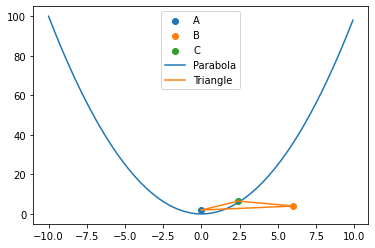

In [11]:
import matplotlib.pyplot as plt 
import numpy as np 
 
# Координаты вершин треугольника 
A = np.array([0, 2]) 
B = np.array([6, 4]) 
C = np.random.rand(2) *10  # случайные координаты точки C 
print(C)
# Вычисляем площадь треугольника 
S = np.abs(np.cross(B - A, C - A)) / 2 
 
# Вычисляем площади двух треугольников разделенных параболой 
k = 3.5  # соотношение площадей (1:3.5) 
S1 = S / (k + 1) 
S2 = S - S1 
 
# Вычисляем координаты точек пересечения параболы с отрезком AB 
a = 1 
b = -2 * C[1] 
c = C[1]**2 - S1 / a 
D = b**2 - 4 * a * c 
x1 = (-b + np.sqrt(D)) / (2 * a) 
x2 = (-b - np.sqrt(D)) / (2 * a) 
y1 = x1**2 + S1 / a 
y2 = x2**2 + S1 / a 
 
# Находим значение h 
h = S1 / (x1**2 + x2**2) 
 
# Печатаем результаты 
print("C: ", C) 
print("S: ", S) 
print("S1: ", S1) 
print("S2: ", S2) 
print("h: ", h) 
 
# Создаем массив x для отрисовки параболы 
x = np.arange(-10, 10, 0.1) 
# Вычисляем y для отрисовки параболы 
y = x**2 + h 
 
plt.scatter(A[0], A[1], label='A')
plt.scatter(B[0], B[1], label='B')
plt.scatter(C[0], C[1], label='C')
plt.plot(x, y, label='Parabola')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], label='Triangle')
plt.legend()
plt.show()

# Задание 2

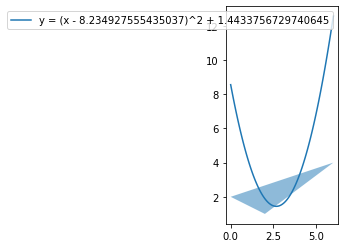

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем координаты вершин треугольника
vertices = np.array([[0,2], [6,4], np.random.randint(10, size=2)])

# Находим площадь треугольника
triangle_area = 0.5 * np.abs(np.cross(vertices[1]-vertices[0], vertices[2]-vertices[0]))

# Задаем функцию для нахождения y по x, d и f
def parabola(x, d, f):
    return (x - d) ** 2 + f, d

# Находим значение f для уравнения параболы, делящей треугольник на 3 равные части
f = triangle_area / (np.sqrt(3) * 2)

# Создаем массивы x и y для построения графика параболы
x = np.linspace(vertices[:,0].min(), vertices[:,0].max(), 100)
y = parabola(x, vertices[:,0].mean(), f)[0]

# Выводим график параболы и треугольника
fig, ax = plt.subplots()
ax.plot(x, y, label=f'y = (x - {y[1]})^2 + {f}')
ax.fill(vertices[:,0], vertices[:,1], alpha=0.5)
ax.set_aspect('equal')
ax.legend()

# Задание 3

In [3]:
# Находим количество решений для d = 1, 2, 4
for d in [1, 2, 4]:
    discriminant = 4 * f - d ** 2
    if discriminant > 0:
        print(f"При d = {d} существует два решения.")
    elif discriminant == 0:
        print(f"При d = {d} существует одно решение.")
    else:
        print(f"При d = {d} решений нет.")

# Находим все значения d, при которых существует решение
discriminant_range = np.arange(-3, 5, 0.01)
d_values = []
for d in discriminant_range:
    if np.any(4 * f - d ** 2 > 0):
        d_values.append(d)
print("Значения d, при которых существуют решения: ", d_values)

При d = 1 существует два решения.
При d = 2 существует два решения.
При d = 4 решений нет.
Значения d, при которых существуют решения:  [-2.630000000000008, -2.620000000000008, -2.6100000000000083, -2.6000000000000085, -2.5900000000000087, -2.580000000000009, -2.570000000000009, -2.5600000000000094, -2.5500000000000096, -2.54000000000001, -2.53000000000001, -2.5200000000000102, -2.5100000000000104, -2.5000000000000107, -2.490000000000011, -2.480000000000011, -2.4700000000000113, -2.4600000000000115, -2.4500000000000117, -2.440000000000012, -2.430000000000012, -2.4200000000000124, -2.4100000000000126, -2.400000000000013, -2.390000000000013, -2.380000000000013, -2.3700000000000134, -2.3600000000000136, -2.350000000000014, -2.340000000000014, -2.3300000000000143, -2.3200000000000145, -2.3100000000000147, -2.300000000000015, -2.290000000000015, -2.2800000000000153, -2.2700000000000156, -2.2600000000000158, -2.250000000000016, -2.240000000000016, -2.2300000000000164, -2.2200000000000166, -2

# Задание 4

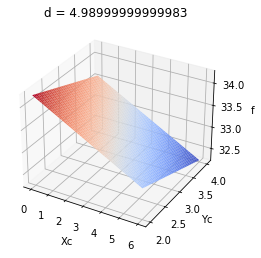

In [4]:
# Построим трехмерный график зависимости f от Xc и Yc
from mpl_toolkits.mplot3d import Axes3D

Xc_range = np.linspace(0, 6, 50)
Yc_range = np.linspace(2, 4, 50)
Xc, Yc = np.meshgrid(Xc_range, Yc_range)
Z = 10 - 0.22 * Xc - 0.33 * Yc + d ** 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Xc')
ax.set_ylabel('Yc')
ax.set_zlabel('f')
ax.set_title(f"d = {d}")
ax.plot_surface(Xc, Yc, Z, cmap=plt.cm.coolwarm)
plt.show()